# **1. Importing libraires**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Top 10 Million Passwords/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Top 10 Million Passwords/10millionPasswords
/content/drive/MyDrive/Top 10 Million Passwords/top-10-million-passwords-analysis.ipynb


# **2. Reading data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
passwords=pd.read_csv("/content/drive/MyDrive/Top 10 Million Passwords/10millionPasswords")
passwords

,rank,password
0,1,123456
1,2,password
2,3,12345678
3,4,qwerty
4,5,123456789
...,...,...
999992,999993,vjht1051
999993,999994,vjht08
999994,999995,Vjht0409
999995,999996,vjht04


<Axes: >

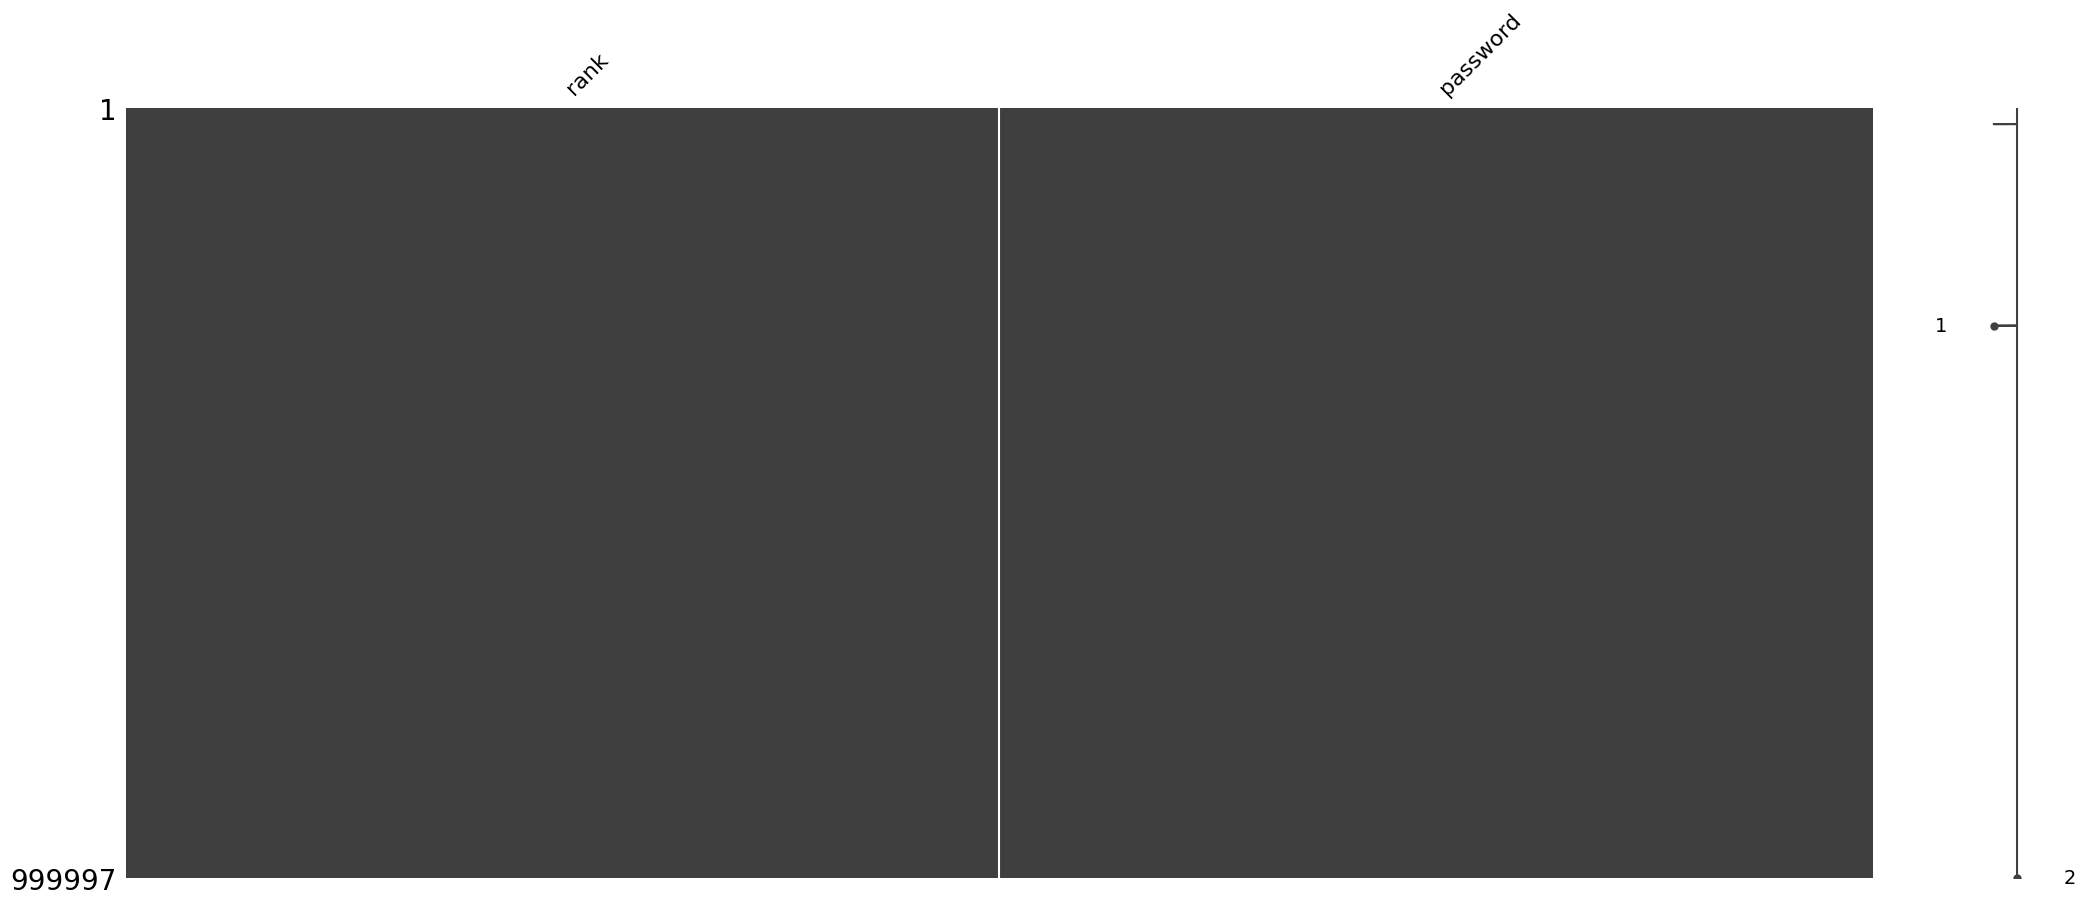

In [5]:
# checking for missing values

import missingno as msno
msno.matrix(passwords)

# **3. Explanatory Data Analysis**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(passwords.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999997 entries, 0 to 999996
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   rank      999997 non-null  int64 
 1   password  999995 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None


In [7]:
# Display the first few rows of the dataset
print(passwords.head())

   rank   password
0     1     123456
1     2   password
2     3   12345678
3     4     qwerty
4     5  123456789


In [8]:
# Summary statistics
print(passwords.describe())

                rank
count  999997.000000
mean   499999.000000
std    288674.412907
min         1.000000
25%    250000.000000
50%    499999.000000
75%    749998.000000
max    999997.000000


In [9]:
# Count the number of unique passwords
unique_passwords_count = passwords['password'].nunique()
print("Number of unique passwords:", unique_passwords_count)

Number of unique passwords: 999995


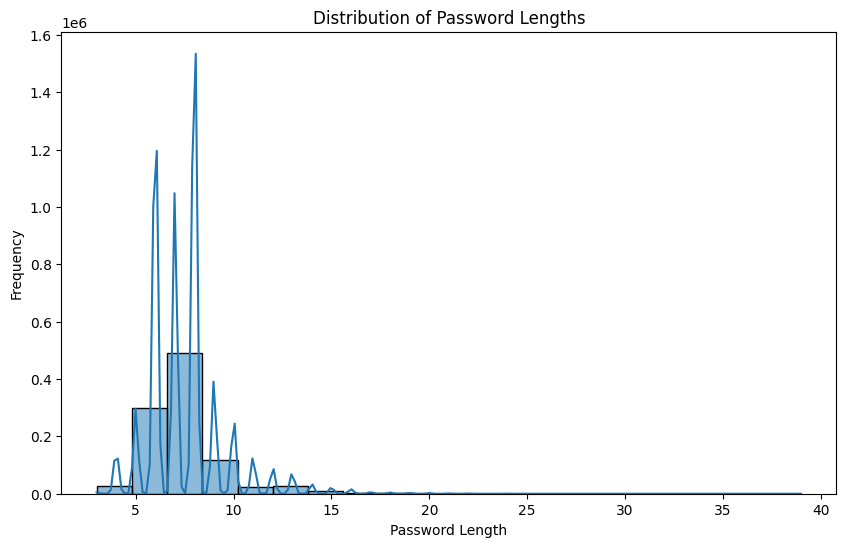

In [10]:
# Convert the 'password' column to strings
passwords['password'] = passwords['password'].astype(str)

# Plot the distribution of password lengths
passwords['password_length'] = passwords['password'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=passwords, x='password_length', bins=20, kde=True)
plt.title("Distribution of Password Lengths")
plt.xlabel("Password Length")
plt.ylabel("Frequency")
plt.show()

In [11]:
# Most common passwords
common_passwords = passwords['password'].value_counts().head(10)
print("Most common passwords:\n", common_passwords)

Most common passwords:
 nan              2
123456           1
76uhUIgwQ7c9k    1
76trombo         1
76trmbns         1
76transa         1
76tHh0HjGNYHo    1
76tghjuy         1
76TDhmP9         1
76style          1
Name: password, dtype: int64


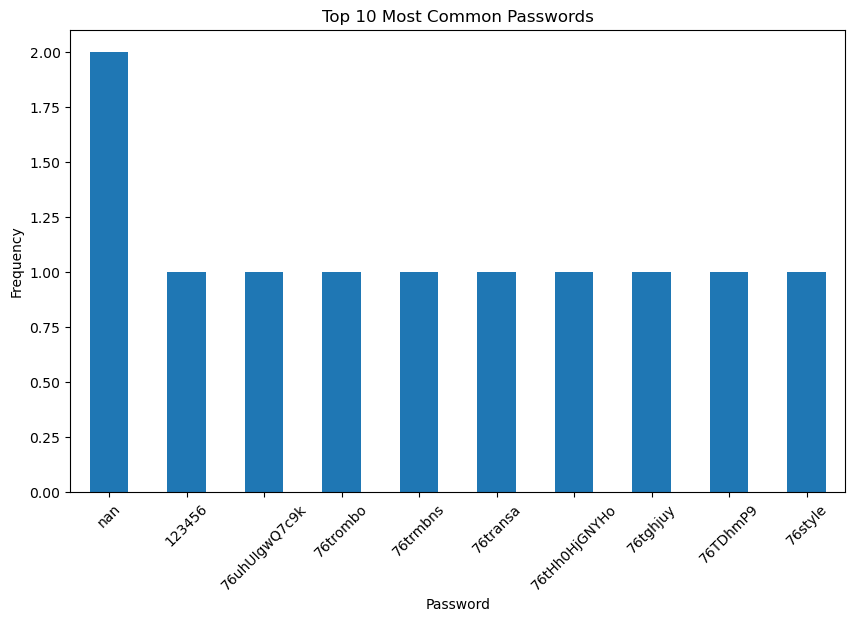

In [ ]:
# Plot the top 10 most common passwords
plt.figure(figsize=(10, 6))
common_passwords.plot(kind='bar')
plt.title("Top 10 Most Common Passwords")
plt.xlabel("Password")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

**Word cloud**

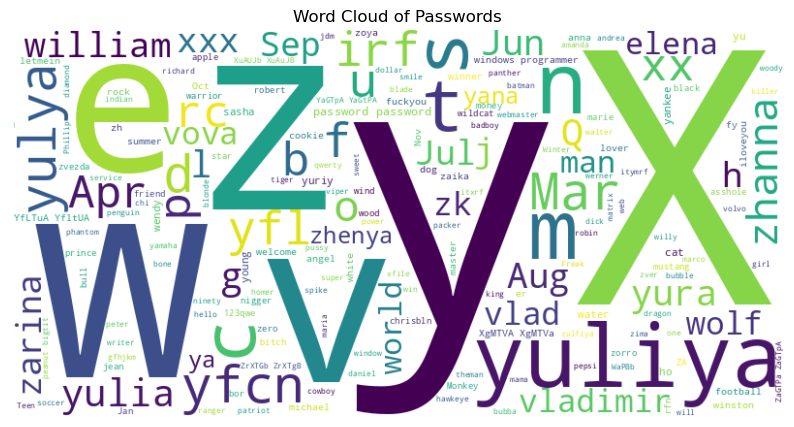

In [ ]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
passwords = pd.read_csv("/content/drive/MyDrive/Top 10 Million Passwords/10millionPasswords")

# Filter out non-string values from the 'password' column
passwords = passwords.dropna(subset=['password'])
passwords['password'] = passwords['password'].astype(str)

# Generate a string with all passwords separated by spaces
all_passwords_text = ' '.join(passwords['password'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_passwords_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Passwords")
plt.show()

**Determining the security level of passwords by a degree-based perspective.**

In [ ]:
import pandas as pd

# Load the dataset
passwords = pd.read_csv("/content/drive/MyDrive/Top 10 Million Passwords/10millionPasswords")

# Convert the 'password' column to strings
passwords['password'] = passwords['password'].astype(str)

# Define a function to assess password security degree
def assess_security(password):
    security_degree = 0

    # Degree based on password length
    if len(password) >= 8:
        security_degree += 1

    # Degree based on use of uppercase and lowercase letters
    if any(c.isupper() for c in password) and any(c.islower() for c in password):
        security_degree += 1

    # Degree based on use of digits
    if any(c.isdigit() for c in password):
        security_degree += 1

    # Degree based on use of special characters
    if any(not c.isalnum() for c in password):
        security_degree += 1

    return security_degree

# Apply the security assessment function to the dataset
passwords['security_degree'] = passwords['password'].apply(assess_security)

# Find the most and least secure passwords
most_secure = passwords.sort_values(by='security_degree', ascending=False).iloc[0]
least_secure = passwords.sort_values(by='security_degree').iloc[0]

# Print the results
print("Most Secure Password:")
print(f"Password: {most_secure['password']}")
print(f"Security Degree: {most_secure['security_degree']}")

print("\nLeast Secure Password:")
print(f"Password: {least_secure['password']}")
print(f"Security Degree: {least_secure['security_degree']}")


Most Secure Password:
Password: Zam_1234
Security Degree: 4

Least Secure Password:
Password: khyber
Security Degree: 0


**Degree-based assessment for all the passwords in the dataset and then plot them on a graph based on their security degree.**

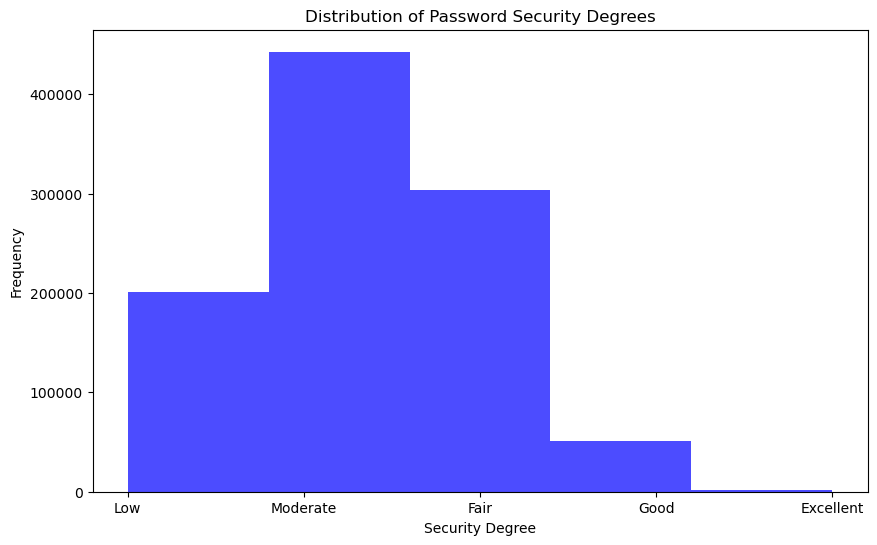

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
passwords = pd.read_csv("/content/drive/MyDrive/Top 10 Million Passwords/10millionPasswords")

# Convert the 'password' column to strings
passwords['password'] = passwords['password'].astype(str)


# Apply the security assessment function to the dataset
passwords['security_degree'] = passwords['password'].apply(assess_security)

# Plot the distribution of security degrees
plt.figure(figsize=(10, 6))
plt.hist(passwords['security_degree'], bins=5, alpha=0.7, color='b')
plt.title("Distribution of Password Security Degrees")
plt.xlabel("Security Degree")
plt.ylabel("Frequency")
plt.xticks(range(5), ['Low', 'Moderate', 'Fair', 'Good', 'Excellent'])
plt.show()

**Dot plots**

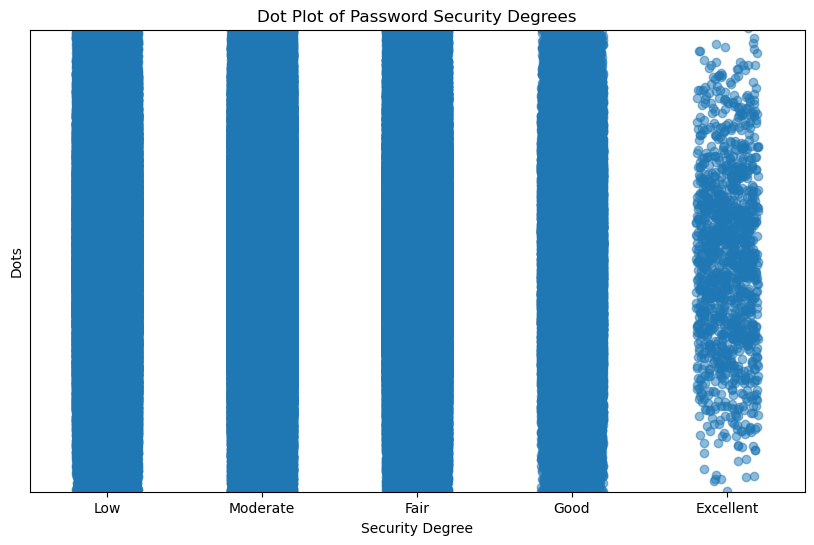

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
passwords = pd.read_csv("/content/drive/MyDrive/Top 10 Million Passwords/10millionPasswords")

# Convert the 'password' column to strings
passwords['password'] = passwords['password'].astype(str)


# Apply the security assessment function to the dataset
passwords['security_degree'] = passwords['password'].apply(assess_security)

# Create a dot plot for password security degrees
plt.figure(figsize=(10, 6))

# Add jitter to the x-coordinates to avoid overlapping dots
jittered_x = passwords['security_degree'] + np.random.uniform(-0.2, 0.2, len(passwords))

plt.plot(jittered_x, np.random.normal(0, 0.02, len(passwords)), 'o', alpha=0.5, markersize=6)
plt.title("Dot Plot of Password Security Degrees")
plt.xlabel("Security Degree")
plt.ylabel("Dots")
plt.xticks(range(5), ['Low', 'Moderate', 'Fair', 'Good', 'Excellent'])
plt.xlim(-0.5, 4.5)
plt.ylim(-0.05, 0.05)
plt.yticks([])
plt.show()